# Chapter 5. 데이터 사전처리
* 전처리 Preprocessing
* 분석 데이터의 품질을 높이기 위한 작업
* 누락, 결측, 중복 데이터 등을 처리

In [ ]:
import pandas as pd
import numpy as np

## 3. 데이터 표준화

### 3-1. 단위 환산

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 
df.head(3)

In [ ]:
# mpg(mile per gallon)를 kpl(kilometer per liter)로 변환 (mpg_to_kpl = 0.425)
mpg_to_kpl = 1.60934 / 3.78541

# mpg 열에 0.425를 곱한 결과를 새로운 열(kpl)에 추가
# df['kpl'] 


In [ ]:
# kpl 열을 소수점 아래 둘째 자리에서 반올림 
# round 함수 사용


### 3-2. 자료형 변환

In [ ]:
# 각 열의 자료형 확인
df.dtypes

In [ ]:
# horsepower 열의 고유값 확인
# unique 함수


In [ ]:
import numpy as np

# 누락 데이터('?') 삭제
# '?'을 np.nan으로 변경
df['horsepower'].replace('?', np.nan, inplace=True)      

# 누락데이터 행을 삭제
# dropna 함수, subset 옵션 사용
# df

# 문자열을 실수형으로 변환
# astype 함수 사용


In [ ]:
# origin 열의 고유값 확인


In [ ]:
# 정수형 데이터를 문자형 데이터로 변환 
df['origin'].replace({1:'USA', 2:'EU', 3:'JAPAN'}, inplace=True)

# origin 열의 고유값과 자료형 확인


In [ ]:
# origin 열의 문자열 자료형을 범주형으로 변환
# 범주형 : category

# 범주형을 문자열로 다시 변환


In [ ]:
# model year 열의 정수형을 범주형으로 변환


-------

## 4. 범주형(카테고리) 데이터 처리

### 4-1. 구간 분할
* 연속 변수를 이산적인 구간으로 표현

In [ ]:
# np.histogram 함수로 3개의 bin으로 나누는 경계 값의 리스트 구하기
count, bin_dividers = np.histogram(df['horsepower'], bins=3)
print(bin_dividers) 

In [ ]:
# 3개의 bin에 이름 지정
bin_names = ['저출력', '보통출력', '고출력']

# pd.cut 함수로 각 데이터를 3개의 bin에 할당
# 옵션 x: 데이터, bins: 경계값 리스트, labels: bin 이름, include_lowest: 첫 경계값 포함 여부 -> 포함(True)
# df['hp_bin'] 

# horsepower 열, hp_bin 열의 첫 15행을 출력


### 4-2. 더미 변수
* Dummy Variable: 컴퓨터가 이해할 수 있는 숫자 0 또는 1로 표현하는 것
* 해당 변수에 해당하면 1, 해당하지 않으면 0
* 원핫벡터(One hot vector): 더미변수로 표현된 벡터 
* 원핫인코딩(One hot encoding): 원핫벡터로 변환하는 방법

In [ ]:
# hp_bin 열의 범주형 데이터를 더미 변수로 변환
# pd.get_dummies 함수, 데이터는 df['hp_bin']

# horsepower_dummies 

#### 원핫인코딩 *참고*

In [ ]:
# sklern 라이브러리 불러오기
from sklearn import preprocessing    

# 전처리를 위한 encoder 객체 만들기
label_encoder = preprocessing.LabelEncoder()       # label encoder 생성
onehot_encoder = preprocessing.OneHotEncoder()   # one hot encoder 생성

# label encoder로 문자열 범주를 숫자형 범주로 변환
onehot_labeled = label_encoder.fit_transform(df['hp_bin'].head(15))  
print(onehot_labeled)
print(type(onehot_labeled))

In [ ]:
# 2차원 행렬로 형태 변경
onehot_reshaped = onehot_labeled.reshape(len(onehot_labeled), 1) 
print(onehot_reshaped)
print(type(onehot_reshaped))

In [ ]:
# 희소행렬로 변환
onehot_fitted = onehot_encoder.fit_transform(onehot_reshaped)
print(onehot_fitted)
print(type(onehot_fitted))

--------

## 5. 정규화

* A: 1-1000 / B: 1-10 ➡️ A의 영향을 더 크게 받음
* 모든 지표들이 동일하게 작용하기 위해 정규화

### 최대값으로 나누기

In [ ]:
# read_csv() 함수로 df 생성
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']  

In [ ]:
# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [ ]:
# horsepower 열의 통계 요약정보로 최대값(max)을 확인
print(df.horsepower.describe())

In [ ]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장
df.horsepower = df.horsepower / abs(df.horsepower.max()) 

In [ ]:
print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

### 최대값-최소값으로 나누기

In [ ]:
df = pd.read_csv('./auto-mpg.csv', header=None)

# 열 이름을 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name']  

# horsepower 열의 누락 데이터('?') 삭제하고 실수형으로 변환
df['horsepower'].replace('?', np.nan, inplace=True)      # '?'을 np.nan으로 변경
df.dropna(subset=['horsepower'], axis=0, inplace=True)   # 누락데이터 행을 삭제
df['horsepower'] = df['horsepower'].astype('float')      # 문자열을 실수형으로 변환

In [ ]:
# horsepower 열의 통계 요약정보로 최대값(max)과 최소값(min)을 확인
print(df.horsepower.describe())
print('\n')

In [ ]:
# horsepower 열의 최대값의 절대값으로 모든 데이터를 나눠서 저장

# 각 데이터에서 min 값 빼기
# min_x 

# 최대값 - 최소값
# min_max 

# min_x/min_max
# df.horsepower 

In [ ]:
print(df.horsepower.head())
print('\n')
print(df.horsepower.describe())

## 6. 시계열 데이터
* Timestamp - 특정 시점
* Period - 두 시점 사이의 기간

### 6-1. 다른 자료형을 시계열 객체로 변환

#### 문자열을 Timestamp 로 변환

In [ ]:
# read_csv() 함수로 CSV 파일을 가져와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

In [ ]:
# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
# to_datetime 함수, 데이터는 df["Date"]

# df['new_Date']

In [ ]:
# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

In [ ]:
# 시계열 값으로 변환된 열을 새로운 행 인덱스로 지정 -> set_index
# 기존 날짜 열은 삭제 -> drop


In [ ]:
# 데이터 내용 및 자료형 자료형 확인
print(df.head())
print('\n')
print(df.info())

#### Timestamp를 Period로 변환

In [ ]:
# 날짜 형식의 문자열로 구성되는 리스트 정의
dates = ['2019-01-01', '2020-03-01', '2021-06-01']

In [ ]:
# 문자열 데이터(시리즈 객체)를 판다스 Timestamp로 변환
# to_datetime 함수, 데이터는 dates

# ts_dates   

In [ ]:
# Timestamp를 Period로 변환
# to_period 함수 , 옵션: freq='D'
pr_day = ts_dates.to_period(freq='D')

In [ ]:
# to_period 함수 , 옵션: freq='M'
pr_month = ts_dates.to_period(freq='M')

In [ ]:
# to_period 함수 , 옵션: freq='A'
pr_year = ts_dates.to_period(freq='A')


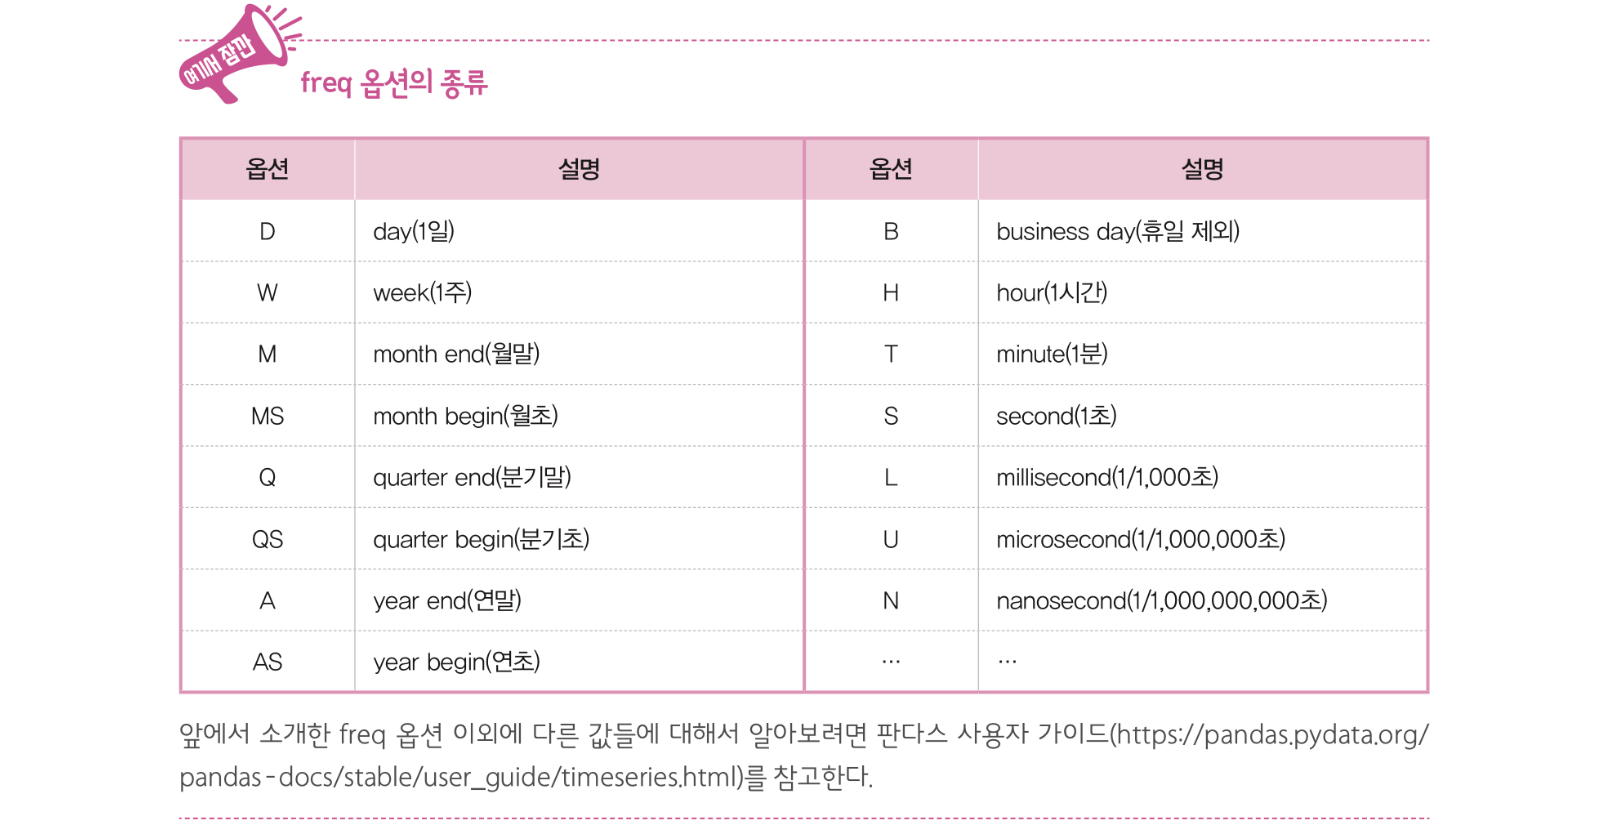

### 6-2. 시계열 데이터 만들기

#### Timestamp 배열

In [ ]:
# Timestamp의 배열 만들기 - 월 간격, 월의 시작일 기준
# date_range 함수
# 옵션: start='2019-01-01' / end=None / periods=6 / freq='MS' / tz='Asia/Seoul'

# ts_ms

In [ ]:
# 월 간격, 월의 마지막 날 기준
# date_range 함수
# 옵션: start='2019-01-01' / periods=6 / freq='M' / tz='Asia/Seoul'

# ts_me

In [ ]:
# 분기(3개월) 간격, 월의 마지막 날 기준
# date_range 함수
# 옵션: start='2019-01-01' / periods=6 / freq='3M' / tz='Asia/Seoul'

# ts_3m

#### Period 배열

In [ ]:
# Period 배열 만들기 - 1개월 길이
# 옵션: start='2019-01-01' / end=None / periods=3 / freq='M'

# pr_m

In [ ]:
# Period 배열 만들기 - 1시간 길이
# 옵션: start='2019-01-01' / end=None / periods=3 / freq='H'

# pr_h 

In [ ]:
# Period 배열 만들기 - 2시간 길이
# 옵션: start='2019-01-01' / end=None / periods=3 / freq='2H'

# pr_2h

### 6-3. 시계열 데이터 활용

#### 날짜 데이터 분리

In [ ]:
# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('stock-data.csv')

# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   #df에 새로운 열로 추가
df.head()

In [ ]:
# dt 속성을 이용하여 new_Date 열의 년월일 정보를 년, 월, 일로 구분
# dt.year / dt.month / dt.day

# df['Year'] 
# df['Month'] 
# df['Day']

In [ ]:
# Timestamp를 Period로 변환하여 년월일 표기 변경하기
# dt.to_period
# 옵션: freq='A'
# df['Date_yr']

# 옵션: freq='M
# df['Date_m'] 

In [ ]:
# 원하는 열을 새로운 행 인덱스로 지정
# set_index, 데이터는 'Date_m'


#### 날짜 인덱스 활용

In [ ]:
# read_csv() 함수로 파일 읽어와서 df로 변환
df = pd.read_csv('stock-data.csv')

In [ ]:
# 문자열인 날짜 데이터를 판다스 Timestamp로 변환
df['new_Date'] = pd.to_datetime(df['Date'])   # 새로운 열에 추가
df.set_index('new_Date', inplace=True)        # 행 인덱스로 지정

In [ ]:
# 날짜 인덱스를 이용하여 데이터 선택하기
# 2018
# df_y

In [ ]:
# loc 로 '2018-07' 찾기
# df_ym 

In [ ]:
# 열 범위 슬라이싱
# 열: '2018-07'/ 행: 'Start':'High'
# df_ym_cols 

In [ ]:
# 날짜 범위 지정
# 범위: '2018-06-25':'2018-06-20'
# df_ymd_range

In [ ]:
# 시간 간격 계산. 최근 180일 ~ 189일 사이의 값들만 선택하기
# 기준일 생성
today = pd.to_datetime('2018-12-25')

# today - 인덱스
# df['time_delta'] 

# time_delta를 인덱스로 지정

# 범위로 날짜 슬라이싱
# 범위: '180 days':'189 days'
# df_180 